# Linear Regression implementation utilizing Pytorch

In [38]:
!pip install --upgrade torch torchvision torchaudio scikit-learn numpy matplotlib
import numpy as np
import torch
import matplotlib.pyplot as plt

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [13]:
print(torch.__version__)

2.5.1+cu124


In [18]:
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = torch.tensor(housing_data_plus_bias)
y = torch.tensor(housing.target.reshape(-1, 1))

if torch.cuda.is_available():
    print("GPU is available. Moving X, and y to GPU")
    X = X.to(device='cuda')
    y = y.to(device='cuda')

GPU is available. Moving X, and y to GPU


In [24]:
XT = torch.transpose(X, 0, 1)

theta = torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(XT, X)), XT), y)

In [25]:
theta

tensor([[-3.6942e+01],
        [ 4.3669e-01],
        [ 9.4358e-03],
        [-1.0732e-01],
        [ 6.4507e-01],
        [-3.9764e-06],
        [-3.7865e-03],
        [-4.2131e-01],
        [-4.3451e-01]], device='cuda:0', dtype=torch.float64)

In [33]:
y_pred = torch.matmul(X, theta)

(torch.sum((y - y_pred) ** 2))**0.5

tensor(104.0288, device='cuda:0', dtype=torch.float64)

(array([3.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 4.000e+00, 7.000e+00,
        5.000e+00, 6.000e+00, 1.800e+01, 2.200e+01, 3.600e+01, 4.300e+01,
        6.100e+01, 9.200e+01, 1.190e+02, 1.830e+02, 2.450e+02, 3.040e+02,
        3.710e+02, 4.260e+02, 5.370e+02, 5.190e+02, 5.920e+02, 6.660e+02,
        7.220e+02, 8.680e+02, 9.480e+02, 9.970e+02, 1.039e+03, 1.038e+03,
        1.081e+03, 1.093e+03, 9.860e+02, 9.560e+02, 9.110e+02, 7.660e+02,
        6.950e+02, 6.670e+02, 6.030e+02, 4.900e+02, 4.140e+02, 3.200e+02,
        2.840e+02, 2.220e+02, 1.830e+02, 1.210e+02, 1.280e+02, 1.010e+02,
        8.900e+01, 8.100e+01, 6.700e+01, 4.900e+01, 4.600e+01, 3.900e+01,
        3.400e+01, 3.100e+01, 2.300e+01, 2.500e+01, 3.100e+01, 3.500e+01,
        1.800e+01, 1.200e+01, 1.600e+01, 1.600e+01, 1.100e+01, 1.100e+01,
        8.000e+00, 1.000e+01, 7.000e+00, 6.000e+00, 6.000e+00, 3.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 7.000e+00, 9.000e+00,
        1.400e+01, 1.100e+01, 5.000e+0

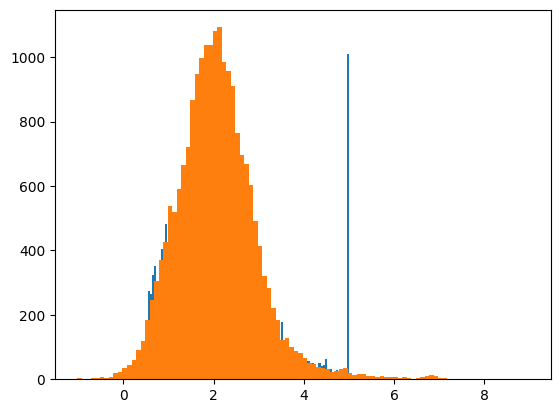

In [49]:
plt.hist(y.cpu(), bins=100)
plt.hist(y_pred.cpu(), bins=100, lw=3, fc=(1, 0, 0, 0.1))